In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import unicodedata
import scipy.stats as stat

In [3]:
x_Bi = np.array([8, 13, 18, 23, 28, 33, 38, 48, 58]) #mm
n_Bi = np.array([441, 344, 243, 190, 172, 143, 129, 150, 108]) #dB
t_Bi = np.array([44.5388, 70.7193, 60.4299, 60.5896, 60.4154, 60.2122, 56.689, 60.5896, 60.0387])
N_Bi = n_Bi/t_Bi*60

In [4]:
n_Bi_min = np.array([524, 384, 272, 221, 198, 161, 136, 169, 111])
N_Bi_min = n_Bi_min/t_Bi*60
n_Bi_plus = np.array([358, 296, 213, 164, 158, 128, 121, 133, 103])
N_Bi_plus = n_Bi_plus/t_Bi*60
sN_top = N_Bi_min - N_Bi
sN_put = N_Bi - N_Bi_plus
sN = np.array([sN_put, sN_top])

In [5]:
fig = plt.figure()
plt.errorbar(x_Bi, N_Bi, fmt = '.', label = "Data")
#plt.errorbar(x_Bi, N_Bi, sN,fmt = '.')
#plt.errorbar(x_Bi, N_Bi_min, fmt = '.')
#plt.errorbar(x_Bi, N_Bi_plus, fmt = '.')
plt.xlabel("Distance [mm]", fontsize = 12)
plt.ylabel("Intensity per minute", fontsize = 12)
plt.axhline(96, color = 'r', label = "Background rad")
plt.axis([0, 60, 0, 625])
plt.legend(fontsize = 10)
plt.title("207Bi")
plt.show()

In [6]:
sN = np.sqrt(N_Bi)
def model(x, A, b):
    #x = np.array(x)
    return( A / x**2 + b)

som = 0
for i in range(len(x_Bi)):
    som = som + N_Bi[i]*x_Bi[i]**2
a = som/len(x_Bi)

x0 = [a, 96]
def chi2(x,y,param,s):
    diff = y - model(x,param[0], param[1])
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(x_Bi, N_Bi, param, sN)

result = opt.minimize(chi2ftie,x0)
A, b = result.x
print(A, b)

v = len(x_Bi) - len([A, b])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([A, b]), v)
print(str(pwaarde*100)+"%")

30859.594932324253 120.10632188176918
15.087901365127543%


In [7]:
f = lambda a: chi2(x_Bi, N_Bi, [a,b], sN) - chi2(x_Bi, N_Bi, [A,b], sN) - 1
A1 = opt.fsolve(f,25000)[0]
A2 = opt.fsolve(f,35000)[0]
sA1 = A-A1
sA2 = A2-A
print(A1,A,A2)
print(sA1,sA2)
print(sA1/A,sA2/A)
print("-----")
f = lambda B: chi2(x_Bi, N_Bi, [A,B], sN) - chi2(x_Bi, N_Bi, [A,b], sN) - 1
B1 = opt.fsolve(f,100)[0]
B2 = opt.fsolve(f,140)[0]
sB1 = b-B1
sB2 = B2-b
print(B1,b,B2)
print(sB1,sB2)
print(sB1/b,sB2/b)

29579.698998990174 30859.594932324253 32139.532000346313
1279.895933334079 1279.93706802206
0.041474813138050515 0.04147614610071808
-----
115.66792473041 120.10632188176918 124.54475145102596
4.438397151359183 4.438429569256783
0.03695390119204777 0.036954171102049946


In [15]:
x = np.linspace(x_Bi.min(), x_Bi.max(), 50)

fig = plt.figure()
plt.errorbar(x_Bi, N_Bi, sN, fmt = '.', label = "Data")
plt.plot(x, model(x, A, b), label = "Inverse-square law")
plt.xlabel("Distance [mm]", fontsize =  12)
plt.ylabel("Intensity per minute", fontsize = 12)
plt.axhline(96, color = 'r', label = "Background radiation")
plt.axhline(96+np.sqrt(96), color = 'r', linestyle = '--')
plt.axhline(96-np.sqrt(96), color = 'r', linestyle = '--')
plt.title("207Bi")
plt.axis([5, 60, 0, 700])
plt.legend(fontsize = 10)
#fig.savefig('207Bi.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [8]:
N_2 = N_Bi / 60
sN_2 = np.sqrt(N_2/60)
print(N_2)
print(sN_2)

[9.90147916 4.86430154 4.02118819 3.1358517  2.84695624 2.37493398
 2.27557374 2.47567239 1.79883975]
[0.40623226 0.28473091 0.25888183 0.22861364 0.21782854 0.19895284
 0.19474658 0.20312855 0.17314925]


In [9]:
fig = plt.figure()
plt.errorbar(x_Bi, N_2, sN_2, fmt = '.')
plt.xlabel("Afstand tot bron [mm]")
plt.ylabel("Intensiteit per minuut")
plt.show()

In [10]:
def model2(x, A, b):
    #x = np.array(x)
    return( A / x**2 + b)


som = 0
for i in range(len(x_Bi)):
    som = som + N_2[i]*x_Bi[i]**2
a = som/len(x_Bi)
x0 = [a, 96/60.7057]
print(x0)
def chi2(x,y,param,s):
    diff = y - model2(x,param[0], param[1])
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(x_Bi, N_2, param, sN_2)

result = opt.minimize(chi2ftie,x0)
A, b = result.x
print(A, b)

v = len(x_Bi) - len([A, b])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([A, b]), v)
print(str(pwaarde*100)+"%")

[2697.442615562657, 1.5814000991669646]
514.326853967172 2.0017718892024905
15.087901366326918%


In [11]:
f = lambda a: chi2(x_Bi, N_2, [a,b], sN_2) - chi2(x_Bi, N_2, [A,b], sN_2) - 1
A1 = opt.fsolve(f,450)[0]
A2 = opt.fsolve(f,560)[0]
sA1 = A-A1
sA2 = A2-A
print(A1,A,A2)
print(sA1,sA2)
print(sA1/A,sA2/A)
print("-----")
f = lambda B: chi2(x_Bi, N_2, [A,B], sN_2) - chi2(x_Bi, N_2, [A,b], sN_2) - 1
B1 = opt.fsolve(f,0)[0]
B2 = opt.fsolve(f,4)[0]
sB1 = b-B1
sB2 = B2-b
print(B1,b,B2)
print(sB1,sB2)
print(sB1/b,sB2/b)

492.99500522745217 514.326853967172 535.6588885782845
21.331848739719874 21.332034611112476
0.04147527700562456 0.04147563839331251
-----
1.9277982418758544 2.0017718892024905 2.0757453538854076
0.07397364732663614 0.0739734646829171
0.03695408439175723 0.0369539931507322


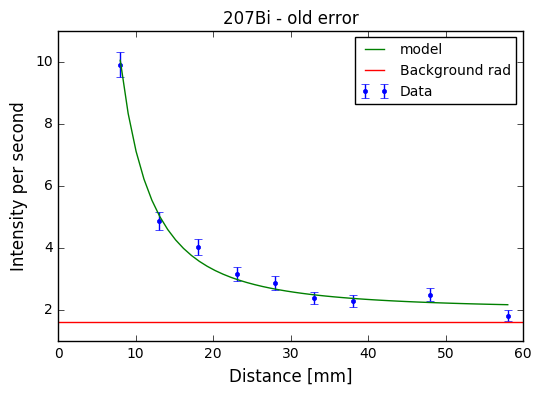

In [12]:
fig = plt.figure()
plt.errorbar(x_Bi, N_2, sN_2, fmt = '.', label = "Data")
plt.plot(x, model2(x, A, b), label = "model")
plt.xlabel("Distance [mm]", fontsize = 12)
plt.ylabel("Intensity per second", fontsize = 12)
plt.axhline(96/60.7057, color = 'r',label = "Background rad")
sBKG = np.sqrt((96/60.7057)/60.7057)
#plt.axhline(96/60.7057+sBKG, color = 'r', linestyle = '--', label = "error on Bcg-rad")
#plt.axhline(96/60.7057-sBKG, color = 'r', linestyle = '--')
plt.legend(fontsize = 10)
plt.title("207Bi - old error")
plt.show()

In [13]:
print(96/60.7057-sBKG ,96/60.7057, 96/60.7057+sBKG)
print(sBKG)
print(np.sqrt(96))

1.4199991274108903 1.5814000991669646 1.7428010709230388
0.16140097175607418
9.797958971132712
